<img src="./logo.png" style="width:1400px;height:250px"/>


## Ilum Escola de Ciência 
###  Curso: Análise Numérica
### Professor: Vinícius Wasques
### Alunos: Gabriel Pereira, Isabela Beneti e Ygor Ruas

## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Agora, para calcular o valor dessa mesma integral no intervalo [0,2] basta subtrair o valor da integral no ponto 2 pelo valor da integral no ponto 0. Logo

$$ \int_{0}^{2} e^x \, dx = e^2 + C - (e^0 + C) = e^2 -1$$

Portanto, o valor exato da área determinada pela função $f(x)$ no intervalo [0,2] é de $e^2 - 1$

In [21]:
def calor_inicial(x):
    return x*(1-x)**2

def solucao_eq_calor_posicao(U, t, R, r):
    """Essa é uma função que resolve a equação do calor em relação à posição em um determinado instante de tempo.
    
    Args:
        U: matriz contendo a solução até o momento
        t: tempo
        R: matriz dos coeficientes
        r: constante do problema
    
    Return:
        Uma matriz contendo a solução das posições
    """
    
    n_colunas = len(U[0])
    y = np.zeros(n_colunas - 2)
    u_n = U[t]
    
    for j in range(n_colunas - 2):
        y[j] = (2 - 2 * r)*u_n[j + 1] + u_n[j] + u_n[j + 2]
        
    y[0] -= U[t + 1, 0]
    y[-1] -= U[t + 1, -1]
    u = np.linalg.solve(R, y)
    
    print(y)
    
    return u
    

def solucao_eq_calor(g, h, k, u_x_0, u_x_1):
    """Essa é uma função que resolve a equação do calor em uma dimensão a partir do método de diferenças finitas.
    
    Args:
        g: passo utilizado na variável de tempo
        h: passo utilizado na variável de espaço
        k: constante k
        u_x_0: valor da função calor na posição inicial
        u_x_1: valor da função calor na posição final
        
    Return:
        Solução da equação para as duas dimensões, admitindo que o domínio discreto é conhecido, a função retorna apenas uma matriz de ordem (1/g) x (1/h)
    """
    
    n_linhas = round(1/g)
    n_colunas = round(1/h)
    
    U = np.zeros((n_linhas, n_colunas))
    
    x = np.linspace(0, 1, n_colunas)
    t = np.linspace(0, 1, n_linhas)
    
    for j in range(n_colunas):
        U[0, j] = calor_inicial(x[j])
        
    U[:, 0] = u_x_0
    U[:, -1] = u_x_1
        
    r = (h**2)/(g*k)
    
    R = np.zeros((n_colunas - 2, n_colunas - 2))
    
    R[0, 0], R[-1, -1] = -(2 + 2 * r), -(2 + 2 * r)
    R[0, 1], R[-1, -2] = 1, 1
    
    for i in range(1, n_colunas - 3):
        R[i, i] = -(2 + 2 * r)
        R[i, i+1] = 1
        R[i, i-1] = 1
    
    for t_ in range(n_linhas - 1):
        u = solucao_eq_calor_posicao(U, t_, R, r)
        
        for j in range(0, n_colunas - 2):
            U[t_ + 1, j + 1] = u[j]
        
    return U, x, t, R

In [22]:
U, x, t, R = solucao_eq_calor(0.05, 0.05, 0.5, 0, 0)

[0.16929582 0.3108908  0.41702872 0.49103368 0.53622977 0.5559411
 0.55349176 0.53220586 0.49540749 0.44642076 0.38856976 0.3251786
 0.25957137 0.19507217 0.1350051  0.08269427 0.04146377 0.0146377 ]
[-2.18234754 -4.18554133 -5.8799154  -7.19769637 -8.1178975  -8.64948977
 -8.82056448 -8.67131995 -8.24946961 -7.60715308 -6.79873254 -5.87903358
 -4.90167873 -3.91718041 -2.97041179 -2.09694991 -1.31755946 -0.62971413]
[ 31.35085251  60.85810862  86.94074913 108.44445406 124.68338342
 135.39958783 140.68816623 140.91655208 136.64983833 128.5855739
 117.49734655 104.18468327  89.4262849   73.93390781  58.30529701
  42.97687407  28.18134484  13.92381352]
[ -472.38110917  -921.94879702 -1328.07004711 -1674.0093955
 -1947.92647314 -2143.15471336 -2257.92308851 -2294.72124225
 -2259.47584614 -2160.6537843  -2008.3612614  -1813.47550982
 -1586.82879887 -1338.46194379 -1076.97486149  -809.02243499
  -539.02948032  -269.2153134 ]
[ 7319.35652158 14330.34955396 20747.4535062  26327.56388236
 30883

In [16]:
U

array([[ 0.00000000e+00,  4.72372066e-02,  8.42688439e-02,
         1.11969675e-01,  1.31214463e-01,  1.42877971e-01,
         1.47834961e-01,  1.46960198e-01,  1.41128444e-01,
         1.31214463e-01,  1.18093016e-01,  1.02638869e-01,
         8.57267823e-02,  6.82315206e-02,  5.10278466e-02,
         3.49905234e-02,  2.09943140e-02,  9.91398163e-03,
         2.62428925e-03,  0.00000000e+00],
       [ 0.00000000e+00, -5.87910840e-01, -1.12410803e+00,
        -1.57423603e+00, -1.92218251e+00, -2.16353182e+00,
        -2.30135772e+00, -2.34351406e+00, -2.30088145e+00,
        -2.18621928e+00, -2.01339346e+00, -1.79682558e+00,
        -1.55105305e+00, -1.29031253e+00, -1.02806314e+00,
        -7.76354224e-01, -5.44911046e-01, -3.39755807e-01,
        -1.61087959e-01,  0.00000000e+00],
       [ 0.00000000e+00,  8.38330001e+00,  1.62609125e+01,
         2.32051661e+01,  2.89105376e+01,  3.32003202e+01,
         3.60122694e+01,  3.73771827e+01,  3.73969680e+01,
         3.62248270e+01,  3.4

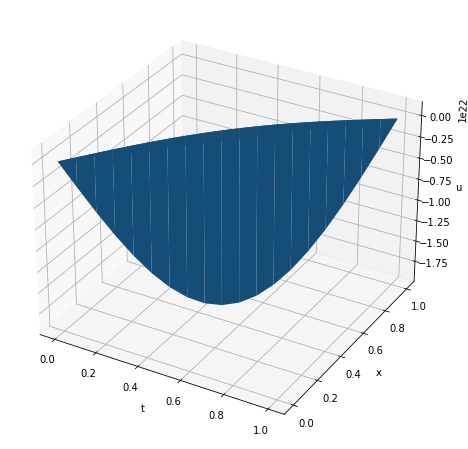

In [8]:
# Criar a figura e os eixos 3D
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar o gráfico 3D
ax.plot_surface(t, x, U)

# Definir rótulos dos eixos
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

# Mostrar o gráfico
plt.show()